In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
covid_df = pd.read_csv("/home/erik/UAS_Final/dataset/COVID-19_Case_Surveillance_Public_Use_Data.csv")

/home/erik/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
covid_df.head()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Unknown,No,No
1,2020/11/14,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
2,2020/11/19,2020/11/10,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,No
3,2020/11/14,2020/11/10,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2020/11/13,2020/11/10,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes


In [4]:
covid_df.tail()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
8405074,2020/10/22,NaN,NaN,Probable Case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing
8405075,2020/10/25,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405076,2020/07/18,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405077,2020/11/19,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,Missing,Missing,Missing,Missing
8405078,2020/11/03,NaN,NaN,Laboratory-confirmed case,Missing,30 - 39 Years,Unknown,No,Unknown,No,Missing


In [5]:
covid_df.shape

(8405079, 11)

In [6]:
covid_df.describe()

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
count,8405079,2870789,4395957,8405079,8405061,8404990,8405072,8405079,8405079,8405079,8405079
unique,321,313,338,2,5,10,9,4,4,4,4
top,2020/06/24,2020/11/09,2020/11/02,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,No,Missing,No,Missing
freq,155857,50595,49527,7910118,4340898,1635264,2781176,3502556,6178281,3690813,6063390


In [7]:
covid_df.columns

Index(['cdc_report_dt', 'pos_spec_dt', 'onset_dt', 'current_status', 'sex',
       'age_group', 'Race and ethnicity (combined)', 'hosp_yn', 'icu_yn',
       'death_yn', 'medcond_yn'],
      dtype='object')

In [8]:
covid_df.nunique()

cdc_report_dt                    321
pos_spec_dt                      313
onset_dt                         338
current_status                     2
sex                                5
age_group                         10
Race and ethnicity (combined)      9
hosp_yn                            4
icu_yn                             4
death_yn                           4
medcond_yn                         4
dtype: int64

In [9]:
covid_df['sex'].unique()

array(['Male', 'Unknown', 'Missing', 'Female', 'Other', nan], dtype=object)

In [10]:
covid_df['age_group'].unique()

array(['10 - 19 Years', '20 - 29 Years', '30 - 39 Years', '40 - 49 Years',
       '50 - 59 Years', '0 - 9 Years', '60 - 69 Years', '80+ Years',
       '70 - 79 Years', nan, 'Unknown'], dtype=object)

In [11]:
covid_df['current_status'].unique()

array(['Laboratory-confirmed case', 'Probable Case'], dtype=object)

In [12]:
covid_df['Race and ethnicity (combined)'].unique()

array(['Black, Non-Hispanic', 'White, Non-Hispanic', 'Unknown',
       'Asian, Non-Hispanic',
       'American Indian/Alaska Native, Non-Hispanic',
       'Multiple/Other, Non-Hispanic', 'Missing',
       'Native Hawaiian/Other Pacific Islander, Non-Hispanic',
       'Hispanic/Latino', nan], dtype=object)

In [13]:
covid_df['hosp_yn'].unique()

array(['No', 'Missing', 'Unknown', 'Yes'], dtype=object)

In [14]:
covid_df.isnull().sum()

cdc_report_dt                          0
pos_spec_dt                      5534290
onset_dt                         4009122
current_status                         0
sex                                   18
age_group                             89
Race and ethnicity (combined)          7
hosp_yn                                0
icu_yn                                 0
death_yn                               0
medcond_yn                             0
dtype: int64

In [15]:
covid_df.shape

(8405079, 11)

In [16]:
#drop kolom tanggal dan menghapus semua null values
covid_df = covid_df.drop(['pos_spec_dt','onset_dt'],axis =1)
covid_df = covid_df.dropna()

In [17]:
covid_df.isnull().sum()

cdc_report_dt                    0
current_status                   0
sex                              0
age_group                        0
Race and ethnicity (combined)    0
hosp_yn                          0
icu_yn                           0
death_yn                         0
medcond_yn                       0
dtype: int64

In [18]:
covid_df.shape

(8404990, 9)

<AxesSubplot:title={'center':'sex'}, ylabel='sex'>

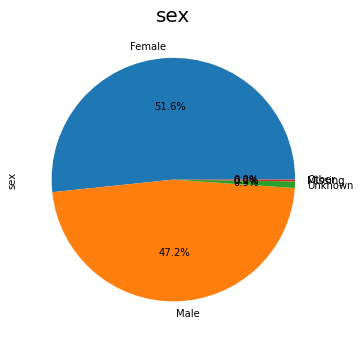

In [19]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('sex',fontsize = 20)
covid_df['sex'].value_counts().plot.pie(autopct="%1.1f%%")

(array([3.970591e+06, 0.000000e+00, 7.383800e+04, 0.000000e+00,
        0.000000e+00, 1.950800e+04, 0.000000e+00, 4.340898e+06,
        0.000000e+00, 1.550000e+02]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

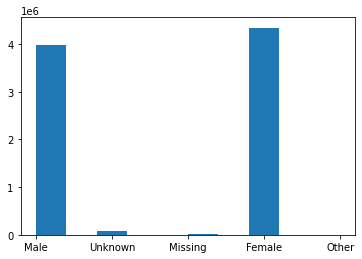

In [20]:
plt.hist(covid_df['sex'])

In [21]:
covid_df['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73838
Missing      19508
Other          155
Name: sex, dtype: int64

<AxesSubplot:title={'center':'age_group'}, ylabel='age_group'>

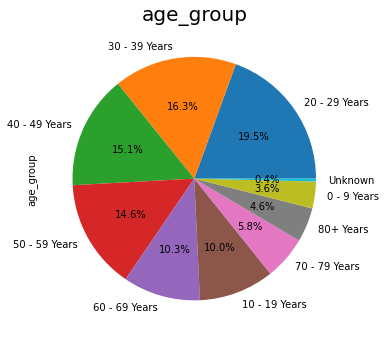

In [22]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('age_group',fontsize = 20)
covid_df['age_group'].value_counts().plot.pie(autopct="%1.1f%%")

(array([ 841450., 1635264., 1372623., 1267350., 1227493.,  299040.,
         863260.,  382869.,  483689.,   31952.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

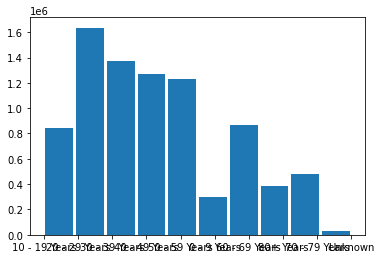

In [23]:
plt.hist(covid_df['age_group'], rwidth=0.9)

<AxesSubplot:xlabel='count', ylabel='age_group'>

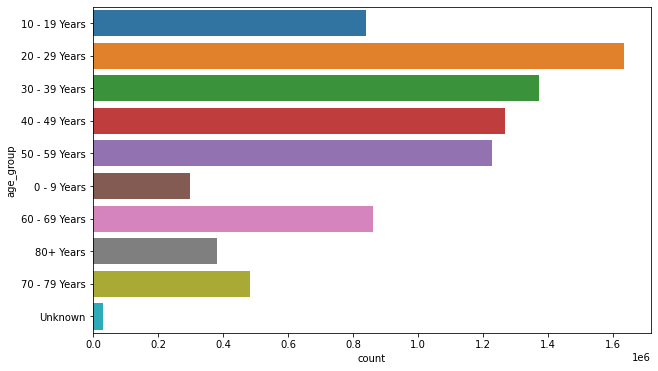

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(y="age_group",data=covid_df)

<AxesSubplot:xlabel='count', ylabel='age_group'>

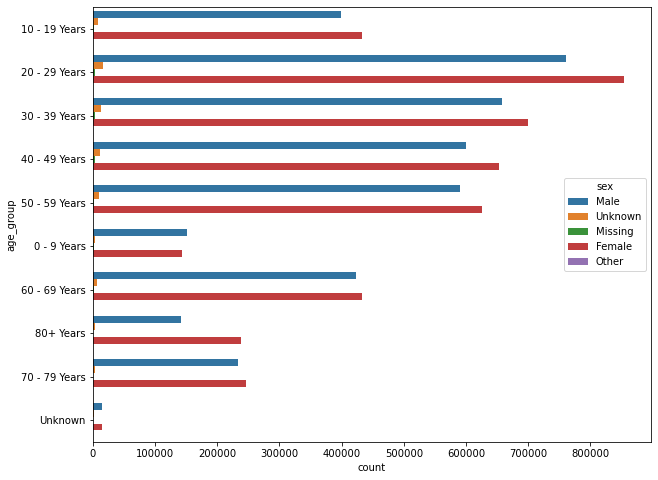

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(y="age_group",hue ='sex',data=covid_df)

In [26]:
covid_df['age_group'].value_counts()

20 - 29 Years    1635264
30 - 39 Years    1372623
40 - 49 Years    1267350
50 - 59 Years    1227493
60 - 69 Years     863260
10 - 19 Years     841450
70 - 79 Years     483689
80+ Years         382869
0 - 9 Years       299040
Unknown            31952
Name: age_group, dtype: int64

<AxesSubplot:title={'center':'current_status'}, ylabel='current_status'>

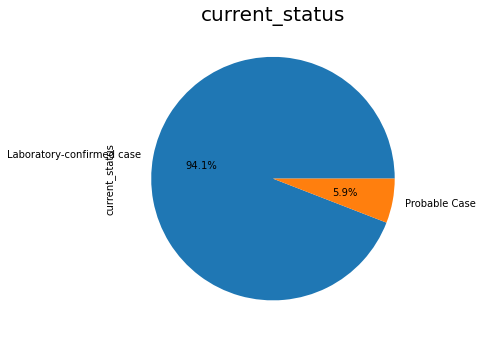

In [27]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('current_status',fontsize = 20)
covid_df['current_status'].value_counts().plot.pie(autopct="%1.1f%%")

(array([7910037.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  494953.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

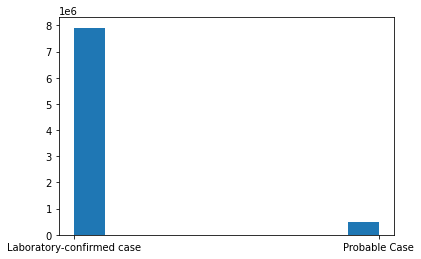

In [28]:
plt.hist(covid_df['current_status'])

In [29]:
covid_df['current_status'].value_counts()

Laboratory-confirmed case    7910037
Probable Case                 494953
Name: current_status, dtype: int64

<AxesSubplot:title={'center':'death_yn'}, ylabel='death_yn'>

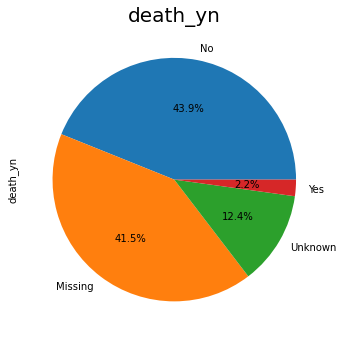

In [30]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('death_yn',fontsize = 20)
covid_df['death_yn'].value_counts().plot.pie(autopct="%1.1f%%")

(array([3690765.,       0.,       0., 3486890.,       0.,       0.,
        1043765.,       0.,       0.,  183570.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

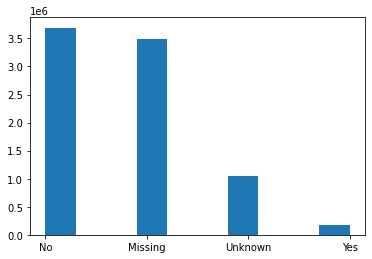

In [31]:
plt.hist(covid_df['death_yn'])

In [32]:
covid_df['death_yn'].value_counts()

No         3690765
Missing    3486890
Unknown    1043765
Yes         183570
Name: death_yn, dtype: int64

<AxesSubplot:title={'center':'Race and ethnicity (combined)'}, ylabel='Race and ethnicity (combined)'>

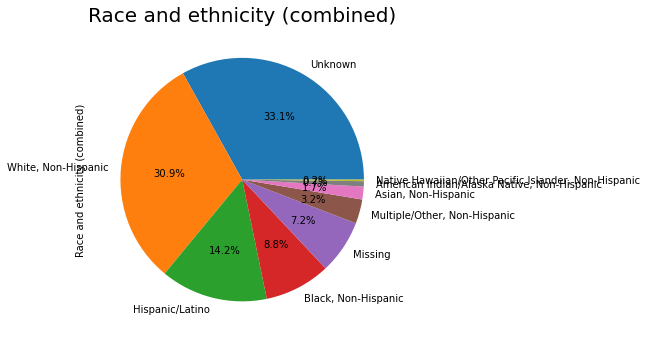

In [33]:
plt.figure(figsize=(30,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(141)
plt.title('Race and ethnicity (combined)',fontsize = 20)
covid_df['Race and ethnicity (combined)'].value_counts().plot.pie(autopct="%1.1f%%")

(array([ 736570., 2599402., 2781165.,  143067.,       0.,   59842.,
         270503.,  601519.,   17196., 1195726.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

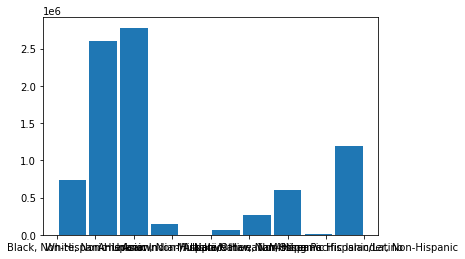

In [34]:
plt.hist(covid_df['Race and ethnicity (combined)'], rwidth=0.9)

<AxesSubplot:xlabel='count', ylabel='Race and ethnicity (combined)'>

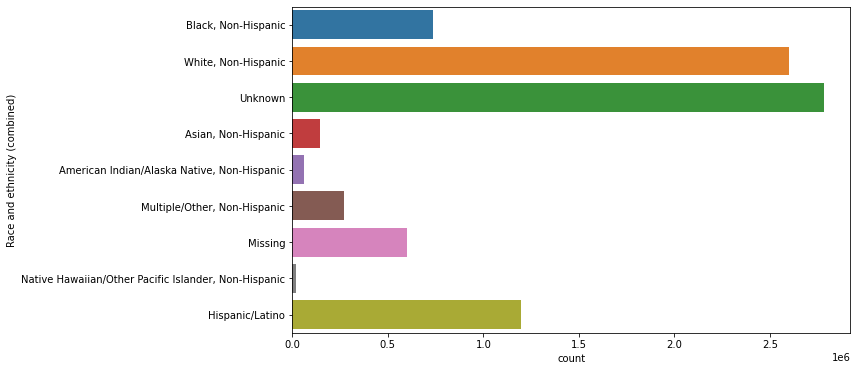

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(y="Race and ethnicity (combined)",data=covid_df)

In [36]:
covid_df['Race and ethnicity (combined)'].value_counts()

Unknown                                                 2781165
White, Non-Hispanic                                     2599402
Hispanic/Latino                                         1195726
Black, Non-Hispanic                                      736570
Missing                                                  601519
Multiple/Other, Non-Hispanic                             270503
Asian, Non-Hispanic                                      143067
American Indian/Alaska Native, Non-Hispanic               59842
Native Hawaiian/Other Pacific Islander, Non-Hispanic      17196
Name: Race and ethnicity (combined), dtype: int64

In [37]:
data = covid_df.copy()

In [38]:
data['sex'].value_counts()

Female     4340898
Male       3970591
Unknown      73838
Missing      19508
Other          155
Name: sex, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

In [40]:
#Convert data 'sex' menjadi numerik
data['sex'] = data['sex'].map({'Female':0,'Male':1,'Unknown':2,'Missing':3,'Other':4})
print(data.head())

  cdc_report_dt             current_status  sex      age_group  \
0    2020/11/10  Laboratory-confirmed case    1  10 - 19 Years   
1    2020/11/14  Laboratory-confirmed case    1  10 - 19 Years   
2    2020/11/19  Laboratory-confirmed case    1  10 - 19 Years   
3    2020/11/14  Laboratory-confirmed case    1  10 - 19 Years   
4    2020/11/13  Laboratory-confirmed case    1  10 - 19 Years   

  Race and ethnicity (combined)  hosp_yn   icu_yn death_yn medcond_yn  
0           Black, Non-Hispanic       No  Unknown       No         No  
1           Black, Non-Hispanic       No       No       No         No  
2           Black, Non-Hispanic       No       No       No         No  
3           Black, Non-Hispanic  Missing  Missing       No    Missing  
4           Black, Non-Hispanic       No       No       No        Yes  


In [41]:
data["current_status"] = lb_make.fit_transform(data["current_status"])
data["hosp_yn"] = lb_make.fit_transform(data["hosp_yn"])
data["icu_yn"] = lb_make.fit_transform(data["icu_yn"])
data["death_yn"] = lb_make.fit_transform(data["death_yn"])
data["medcond_yn"] = lb_make.fit_transform(data["medcond_yn"])

In [42]:
data.head()

,cdc_report_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/10,0,1,10 - 19 Years,"Black, Non-Hispanic",1,2,1,1
1,2020/11/14,0,1,10 - 19 Years,"Black, Non-Hispanic",1,1,1,1
2,2020/11/19,0,1,10 - 19 Years,"Black, Non-Hispanic",1,1,1,1
3,2020/11/14,0,1,10 - 19 Years,"Black, Non-Hispanic",0,0,1,0
4,2020/11/13,0,1,10 - 19 Years,"Black, Non-Hispanic",1,1,1,3


In [43]:
data.shape

(8404990, 9)

In [44]:
X =  data[['current_status','hosp_yn','icu_yn','medcond_yn','sex']]
y = data['death_yn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

73.29

In [46]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

78.07

In [47]:
#Model Evaluation
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Score': [ acc_log, acc_decision_tree]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
1,Decision Tree,78.07
0,Logistic Regression,73.29


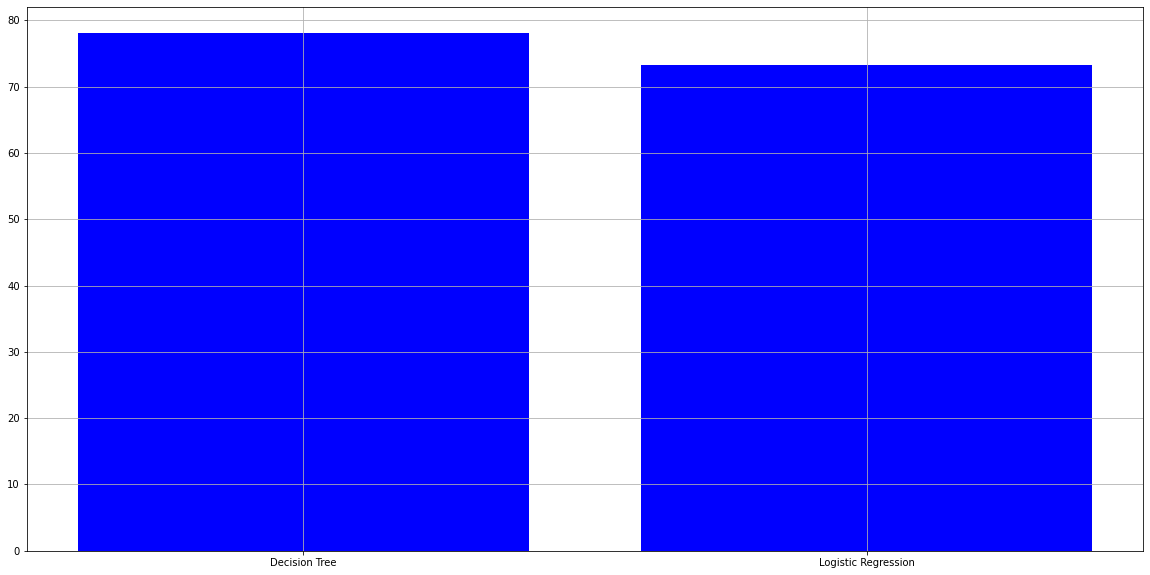

In [48]:
plt.figure(figsize=(20,10))
fig = plt.bar(sorted_model['Model'], sorted_model['Score'],color='blue')
plt.grid()
plt.show()